In [30]:
import numpy as np
import scipy
import random

In [31]:
def gen_bern(probability):
    """
    Generate a random value of 1 or 0 based on the given probability.
    
    Args:
        probability (float): The probability of generating 1.
        
    Returns:
        int: Either 1 or 0, with the specified probability.
    """
    if probability < 0 or probability > 1:
        raise ValueError("Probability must be between 0 and 1.")
    
    return random.randint(0, 1) if random.random() < probability else 0

In [127]:
# Depletion functions for each patch
def depletion_func(a, b, c, d, t):
    return a * (b ** (-c*t)+d)
    
def calc_total_reward_rate(num_patches, travel_time, max_time, reward_value, a, b, c, d):
    """
    Calculate the total reward rate for a discrete-time foraging system.

    Args:
        num_patches (int): Number of patches in the environment.
        travel_time (int): Time required to travel between patches.
        max_time (list): Maximum time to forage in a patch.
        reward_value (float): Constant reward value. #leaving this as a variable in case we want dynamic

    Returns:
        float: Total reward rate for the entire environment.
    """
    total_reward = 0
    total_time = 0

    for patch_id in range(num_patches): #could change this to a list of patches in order
        patch_reward = 0
        patch_time = max_time[patch_id]

        for t in range(patch_time):
            prob_reward = depletion_func(a[patch_id],b[patch_id],c[patch_id],d[patch_id],t)
            instantaneous_rate =  prob_reward * reward_value # probabilistic version: gen_bern(prob_reward) * reward_value
            patch_reward += instantaneous_rate

        total_reward += patch_reward
        total_time += max_time[patch_id] + travel_time

    total_reward_rate = total_reward / total_time
    return total_reward_rate

In [161]:
# Example usage
num_patches = 2
travel_time = 2
max_time = [1,9]
reward_value = 5

# Initial probabilities of reward in each patch
a = [.9, .4]
b = [2.76, 2.76]
c = [.1278, .1278]
d = [0, 0]

total_reward_rate = calc_total_reward_rate(num_patches, travel_time, max_time, reward_value, a, b, c, d)
print(f"Total reward rate: {total_reward_rate}")

Total reward rate: 1.130239956448668


In [162]:
best_time = [1,1] #100 steps
# Example usage
num_patches = 2
travel_time = 1
max_time = [1,9]
reward_value = 5

# Initial probabilities of reward in each patch
grid = np.zeros((20,20))
for x in range(20):
    for y in range (20):
        total_reward_rate = calc_total_reward_rate(num_patches, travel_time, [x,y], reward_value, a, b, c, d)
        grid[x,y] = total_reward_rate

Text(0, 0.5, 'stay in patch 2')

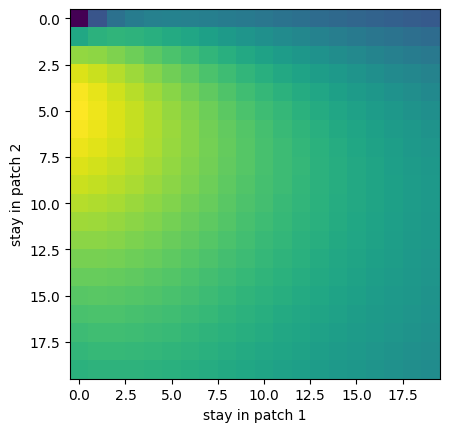

In [163]:
plt.imshow(grid)
plt.xlabel('stay in patch 1')
plt.ylabel('stay in patch 2')

In [164]:
# Find the indices of the maximum value(s) in the grid
best_time = np.unravel_index(grid.argmax(), grid.shape)

# Print the maximum value(s) and their coordinates
max_values = grid[best_time]
print('max reward rate: ' +str(max_values))

max reward rate: 2.521579155937771


In [165]:
best_time

(5, 0)

[0.9, 0.7904862658184875, 0.6942983738307293, 0.609814809881446, 0.5356113687822168, 0.4704371453762037, 0.4131934470563824, 0.36291527224918735, 0.3187550426319553, 0.27996831484549684, 0.2459012308330126, 0.21597949524595342, 0.18969869410037274, 0.16661579147783018, 0.14634166092411305, 0.12853452564175263, 0.11289419689255517, 0.09915701348241447, 0.08709139701936361, 0.07649394801639119]
[0.4, 0.3513272292526611, 0.30857705503587973, 0.2710288043917538, 0.23804949723654079, 0.2090831757227572, 0.18364153202505884, 0.1612956765551944, 0.14166890783642458, 0.12443036215355414, 0.10928943592578338, 0.09599088677597929, 0.08431053071127678, 0.07405146287903563, 0.06504073818849469, 0.057126455840778946, 0.05017519861891341, 0.044069783769961984, 0.038707287564161606, 0.033997310229507194]


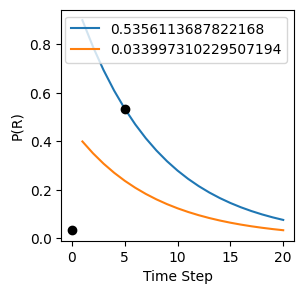

In [166]:
import matplotlib.pyplot as plt

max_time = 20

# Create a range of time steps
time_steps = np.arange(max_time)

# Plot the depletion rate over time
plt.figure(figsize=(3, 3))

for patch_id in range(num_patches): #could change this to a list of patches in order
    
    # Compute the depletion rate for each time step
    p_R = [depletion_func(a[patch_id],b[patch_id],c[patch_id],d[patch_id],t) for t in time_steps]
    print(p_R)

    plt.plot(time_steps+1, p_R,label = str(p_R[best_time[patch_id]-1]))
    plt.plot(best_time[patch_id], p_R[best_time[patch_id]-1],'ok')

plt.xlabel('Time Step')
plt.ylabel('P(R)')
plt.legend()
plt.show()